<a href="https://colab.research.google.com/github/joheras/MusicaCatedralStoDomingoIER/blob/main/Notebooks/SacarM%C3%BAsica/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ice Vision

In [ ]:
%%capture
!unzip pents.zip

In [ ]:
for k in range(0,44):
  p = cv2.imread('/content/pentagramas/pent' + str(muestra[k]) + '.jpg')
  cv2.imwrite('/content/pents/images/pent' + str(muestra[k]) + '.jpg',p)

In [ ]:
class AnotacionParser(parsers.Parser, parsers.FilepathMixin, parsers.LabelsMixin, parsers.BBoxesMixin):
    pass

In [ ]:
AnotacionParser.generate_template()

def __iter__(self) -> Any:
def imageid(self, o) -> Hashable:
def image_width_height(self, o) -> Tuple[int, int]:
    return get_image_size(self.filepath(o))
def filepath(self, o) -> Union[str, Path]:
def bboxes(self, o) -> List[BBox]:
def labels(self, o) -> List[int]:


In [ ]:
class AnotacionParser(parsers.Parser, parsers.FilepathMixin, parsers.LabelsMixin, parsers.BBoxesMixin):
    def __init__(self, path_img,path_anotaciones):
        self.path_img = path_img
        self.path_anotaciones= path_anotaciones

    def __iter__(self):
      with os.scandir(self.path_anotaciones) as ficheros:
        for fichero in ficheros:
          if fichero.name!='.ipynb_checkpoints':
            yield fichero.name

    def imageid(self, o) -> Hashable: #o --> nombre de la anotación
      return o[:o.find('.')]

    def filepath(self, o) -> Union[str, Path]:
      path=Path(f"{o[:o.find('.')]}.jpg")
      return self.path_img / path

    def image_width_height(self, o) -> Tuple[int, int]:
      return get_image_size(self.path_img+'/'+f"{o[:o.find('.')]}.jpg")

    def labels(self, o) -> List[int]:
      d={'claved':0, 'claves':1, 'clavef':2, 'nota1':3, 'nota2':4, 'nota4':5, 'nota1:2':6, 'nota1:4':7, 'notae':8, 'sos':9, 'bem':10, 'bec':11, 'sil0':12, 'sil1':13, 'sil2':14, 'sil1:2':15, 'sil1:4':16, '2x4':17, '3x4':18, '4x4':19, '6x8':20, 'punt':21, 'liga':22,'3':23,'line':24}
      path=self.path_anotaciones+'/'+o
      anotacion=json.loads(open(path).read())
      label=[]
      for L in anotacion:
        label.append(d[L['label']])
      return label

    def bboxes(self, o) -> List[BBox]:
      path=self.path_anotaciones+'/'+o
      anotacion=json.loads(open(path).read())
      bbox=[]
      for L in anotacion:
        bbox.append(BBox.from_xyxy(L['box'][0],L['box'][1],L['box'][2],L['box'][3]))
      return bbox

In [ ]:
files = get_files('/content/pents', folders = ['images'])

In [ ]:
files[0]

Path('/content/pents/images/pent1042.jpg')

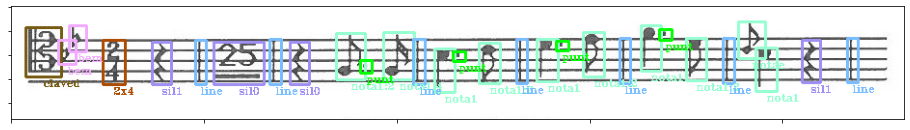

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(16,5))
ax.imshow(imgEscrita(files[0]),cmap=plt.cm.binary)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
plt.show()

In [ ]:
anot=AnotacionParser('pents/images','pents/annotations')

In [ ]:
for x in anot:
  print(x)

pent1819.json
pent508.json
pent974.json
pent2021.json
pent1135.json
pent483.json
pent1863.json
pent209.json
pent45.json
pent1576.json
pent472.json
pent1056.json
pent1242.json
pent1422.json
pent1746.json
pent1331.json
pent621.json
pent283.json
pent1042.json
pent1412.json
pent1104.json
pent30.json
pent1930.json
pent1248.json
pent930.json
pent1353.json
pent2060.json
pent1118.json
pent1921.json
pent1226.json
pent510.json
pent2168.json
pent1350.json
pent1643.json
pent434.json
pent1211.json
pent734.json
pent678.json
pent941.json
pent1961.json
pent1407.json
pent1661.json
pent1954.json
pent801.json


In [ ]:
anot.imageid('pent1042.jpg')

'pent1042'

In [ ]:
anot.imageid('pent1042.json')

'pent1042'

In [ ]:
anot.filepath('pent1042.json')

Path('pents/images/pent1042.jpg')

In [ ]:
anot.image_width_height('pent1042.json')

(926, 117)

In [ ]:
anot.labels('pent1042.json')

[0,
 10,
 10,
 17,
 13,
 24,
 12,
 24,
 12,
 6,
 21,
 7,
 24,
 3,
 21,
 6,
 24,
 3,
 21,
 6,
 24,
 3,
 21,
 6,
 24,
 8,
 3,
 13,
 24]

In [ ]:
anot.filepath('pent1042.jpg')

Path('pents/images/pent1042.jpg')

In [ ]:
anot.bboxes('pent1042.json')

[<BBox (xmin:15, ymin:22, xmax:52, ymax:73)>,
 <BBox (xmin:49, ymin:35, xmax:67, ymax:60)>,
 <BBox (xmin:60, ymin:20, xmax:78, ymax:47)>,
 <BBox (xmin:95, ymin:35, xmax:118, ymax:81)>,
 <BBox (xmin:146, ymin:37, xmax:166, ymax:81)>,
 <BBox (xmin:191, ymin:35, xmax:202, ymax:81)>,
 <BBox (xmin:210, ymin:37, xmax:262, ymax:81)>,
 <BBox (xmin:268, ymin:34, xmax:280, ymax:81)>,
 <BBox (xmin:289, ymin:37, xmax:309, ymax:81)>,
 <BBox (xmin:337, ymin:28, xmax:367, ymax:76)>,
 <BBox (xmin:362, ymin:56, xmax:374, ymax:69)>,
 <BBox (xmin:386, ymin:27, xmax:418, ymax:76)>,
 <BBox (xmin:417, ymin:34, xmax:429, ymax:81)>,
 <BBox (xmin:439, ymin:44, xmax:460, ymax:89)>,
 <BBox (xmin:458, ymin:47, xmax:471, ymax:57)>,
 <BBox (xmin:485, ymin:38, xmax:507, ymax:80)>,
 <BBox (xmin:524, ymin:34, xmax:535, ymax:80)>,
 <BBox (xmin:545, ymin:34, xmax:567, ymax:78)>,
 <BBox (xmin:565, ymin:36, xmax:578, ymax:46)>,
 <BBox (xmin:593, ymin:27, xmax:615, ymax:73)>,
 <BBox (xmin:631, ymin:33, xmax:642, ymax:80)>,

In [ ]:
train_rs, valid_rs = anot.parse()

0it [00:00, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:126
AUTOFIX-START - ️🔨  Autofixing record with imageid: 27  ️🔨 | icevision.core.record:_pre_replay:92
AUTOFIX-SUCCESS - Clipping bbox ymax from 120 to image height 117 (Before: <BBox (xmin:16, ymin:82, xmax:53, ymax:120)>) | icevision.core.bbox:autofix:86
AUTOFIX-SUCCESS - Clipping bbox ymax from 122 to image height 117 (Before: <BBox (xmin:596, ymin:58, xmax:620, ymax:122)>) | icevision.core.bbox:autofix:86
AUTOFIX-SUCCESS - Clipping bbox ymax from 121 to image height 117 (Before: <BBox (xmin:636, ymin:52, xmax:657, ymax:121)>) | icevision.core.bbox:autofix:86
AUTOFIX-SUCCESS - Clipping bbox ymax from 120 to image height 117 (Before: <BBox (xmin:660, ymin:60, xmax:686, ymax:120)>) | icevision.core.bbox:autofix:86
AUTOFIX-START - ️🔨  Autofixing record with imageid: 31  ️🔨 | icevision.core.record:_pre_replay:92
AUTOFIX-SUCCESS - Clipping bbox ymax from 120 to image height 117 (Before: <BBox (xmin:13, ymin:47, xmax:51, ymax:1

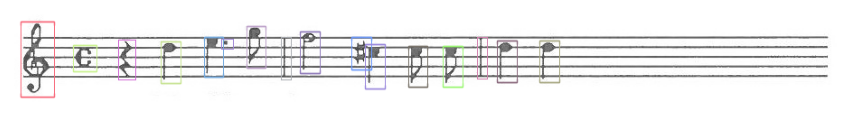

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15, 20))
show_record(train_rs[5], display_label=False,ax=ax)

## FasterRCNN

In [ ]:
class EarlyStoppingMAP(fastai.EarlyStoppingCallback):
  def __init__(self, monitor='valid_loss', comp=None, min_delta=0., patience=5, reset_on_fit=True):
    super().__init__(monitor=monitor, comp=comp, min_delta=min_delta, patience=patience,reset_on_fit=reset_on_fit)

  def before_fit(self):
    self.wait = 0; super().before_fit()

  def after_epoch(self):
    "Compare the value monitored to its best score and maybe stop training."
    val = self.recorder.values[-1][self.idx]
    if self.comp(val, self.best):
      self.best, self.new_best = val, True
    else:
      self.new_best = False


    if self.new_best:
      self.wait = 0
    else:
      self.wait += 1
      if self.wait >= self.patience:
        print(f'No improvement since epoch {self.epoch-self.wait}: early stopping')
        raise fastai.CancelFitException()

class SaveModelMAP(fastai.SaveModelCallback):
  def __init__(self, monitor='valid_loss', comp=None, min_delta=0., fname='model', every_epoch=False, with_opt=False,
               reset_on_fit=True):
    super().__init__(monitor=monitor, comp=comp, min_delta=min_delta, fname=fname,every_epoch=every_epoch, with_opt=with_opt,
                     reset_on_fit=reset_on_fit)

  def _save(self, name):
    super()._save(name)

  def after_epoch(self):
    "Compare the value monitored to its best score and save if best."
    if self.every_epoch:
      self._save(f'{self.fname}_{self.epoch}')
    else:  # every improvement
      val = self.recorder.values[-1][self.idx]
      if self.comp(val, self.best):
        self.best, self.new_best = val, True
      else:
        self.new_best = False

      if self.new_best:
        print(f'Better model found at epoch {self.epoch} with {self.monitor} value: {self.best}.')
        self._save(f'{self.fname}')

  def after_fit(self, **kwargs):
    "Load the best model."
    super().after_fit(**kwargs)


class ReduceLRMAP(fastai.ReduceLROnPlateau):
  def __init__(self, monitor='valid_loss', comp=None, min_delta=0., patience=1, factor=10., min_lr=0,
               reset_on_fit=True):
    super().__init__(monitor=monitor, comp=comp, min_delta=min_delta, patience=patience,factor=factor,min_lr=min_lr,
                     reset_on_fit=reset_on_fit)

  def before_fit(self):
    self.wait = 0; super().before_fit()

  def after_epoch(self):
    "Compare the value monitored to its best score and reduce LR by `factor` if no improvement."
    val = self.recorder.values[-1][self.idx]
    if self.comp(val, self.best):
      self.best, self.new_best = val, True
    else:
      self.new_best = False

    if self.new_best:
      self.wait = 0
    else:
      self.wait += 1
      if self.wait >= self.patience:
        old_lr = self.opt.hypers[-1]['lr']
        for h in self.opt.hypers: h['lr'] = max(h['lr'] / self.factor, self.min_lr)
        self.wait = 0
        if self.opt.hypers[-1]["lr"] < old_lr:
          print(f'Epoch {self.epoch}: reducing lr to {self.opt.hypers[-1]["lr"]}')


def compareM(x1,x2):
  if isinstance(x1,dict):
    x1=float(x1['mAP'])
  if isinstance(x2,dict):
    x2=float(x2['mAP'])
  return np.greater(x1,x2)

In [ ]:
model = faster_rcnn.model(num_classes=25)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [ ]:
presize = 926
size = 926

In [ ]:
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size), tfms.A.Normalize()])
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=size, presize=presize,shift_scale_rotate=None,crop_fn=None, horizontal_flip=None, pad=None), tfms.A.Normalize()])

In [ ]:
train_ds = Dataset(train_rs, train_tfms)
valid_ds = Dataset(valid_rs, valid_tfms)

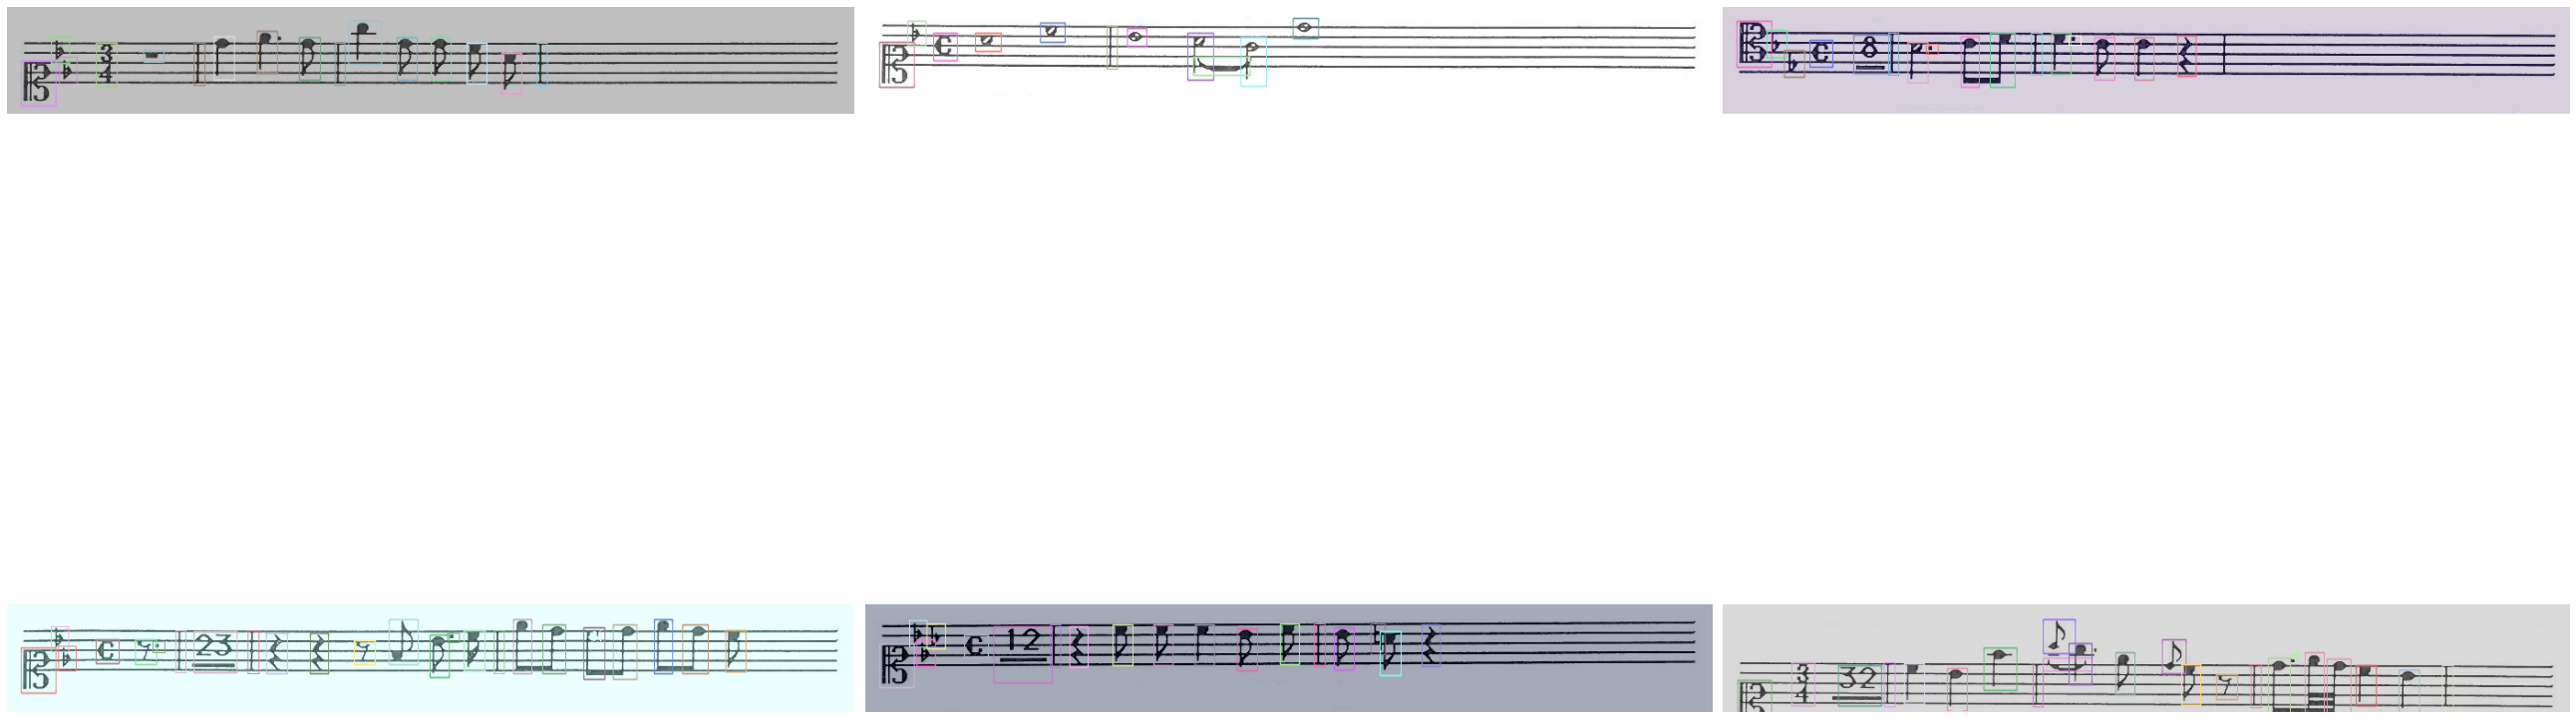

In [ ]:
samples = [train_ds[i] for i in range(6)]
show_samples(samples, denormalize_fn=denormalize_imagenet, ncols=3, display_label=False, show=True)

In [ ]:
train_dl = faster_rcnn.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)
valid_dl = faster_rcnn.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)

In [ ]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

In [ ]:
saveM=SaveModelMAP(monitor='COCOMetric',fname='FasterRCMM',comp=compareM)
lrReduce=ReduceLRMAP(monitor='COCOMetric',patience=3, factor=10.0, min_lr=0,comp=compareM)
early=EarlyStoppingMAP(monitor='COCOMetric',patience=5,comp=compareM)

In [ ]:
learn = faster_rcnn.fastai.learner(dls=[train_dl, valid_dl], model=model, metrics=metrics,cbs=[saveM,lrReduce,early])

In [ ]:
print(learn.recorder.metrics)
(min_lr,step)=learn.lr_find(show_plot=False)

SuggestedLRs(lr_min=0.00020892962347716094, lr_steep=6.918309736647643e-06)

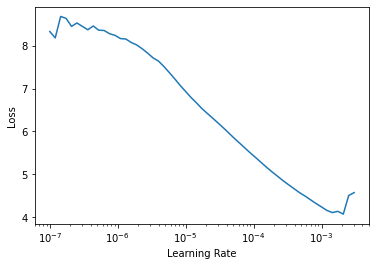

In [ ]:
learn.lr_find()

In [ ]:
print(min_lr)

0.0002511886414140463


In [ ]:
learn.fine_tune(150, lr_min=min_lr, lr_step=step, freeze_epoch=2)

epoch,train_loss,valid_loss,COCOMetric,time
0,7.479649,5.991398,0.000347,00:06


Better model found at epoch 0 with COCOMetric value: 0.0003474031613687684.


/usr/local/lib/python3.6/dist-packages/fastai/learner.py:54: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,COCOMetric,time
0,3.261867,1.860705,0.000000,00:06
1,2.636743,2.180796,0.016036,00:05
2,2.472816,1.989556,0.076503,00:05
3,2.331612,1.857251,0.094522,00:05
4,2.196342,1.696526,0.100468,00:06
5,2.099094,1.592521,0.207176,00:05
6,1.987253,1.485183,0.254707,00:06
7,1.886280,1.394037,0.283423,00:05
8,1.792667,1.281592,0.325823,00:05
9,1.703389,1.151499,0.335258,00:06


Better model found at epoch 0 with COCOMetric value: 0.0.
Better model found at epoch 1 with COCOMetric value: 0.016036163640671446.
Better model found at epoch 2 with COCOMetric value: 0.07650299045427203.
Better model found at epoch 3 with COCOMetric value: 0.09452167966499801.
Better model found at epoch 4 with COCOMetric value: 0.1004681956310543.
Better model found at epoch 5 with COCOMetric value: 0.20717589052421395.
Better model found at epoch 6 with COCOMetric value: 0.2547067220501038.
Better model found at epoch 7 with COCOMetric value: 0.2834232253587293.
Better model found at epoch 8 with COCOMetric value: 0.3258233650636913.
Better model found at epoch 9 with COCOMetric value: 0.3352580112110778.
Better model found at epoch 10 with COCOMetric value: 0.35892364927298887.
Better model found at epoch 11 with COCOMetric value: 0.3994124291872136.
Better model found at epoch 12 with COCOMetric value: 0.4139333288681729.
Better model found at epoch 13 with COCOMetric value: 0.4

In [ ]:
learn.save('model1')

Path('models/model1.pth')

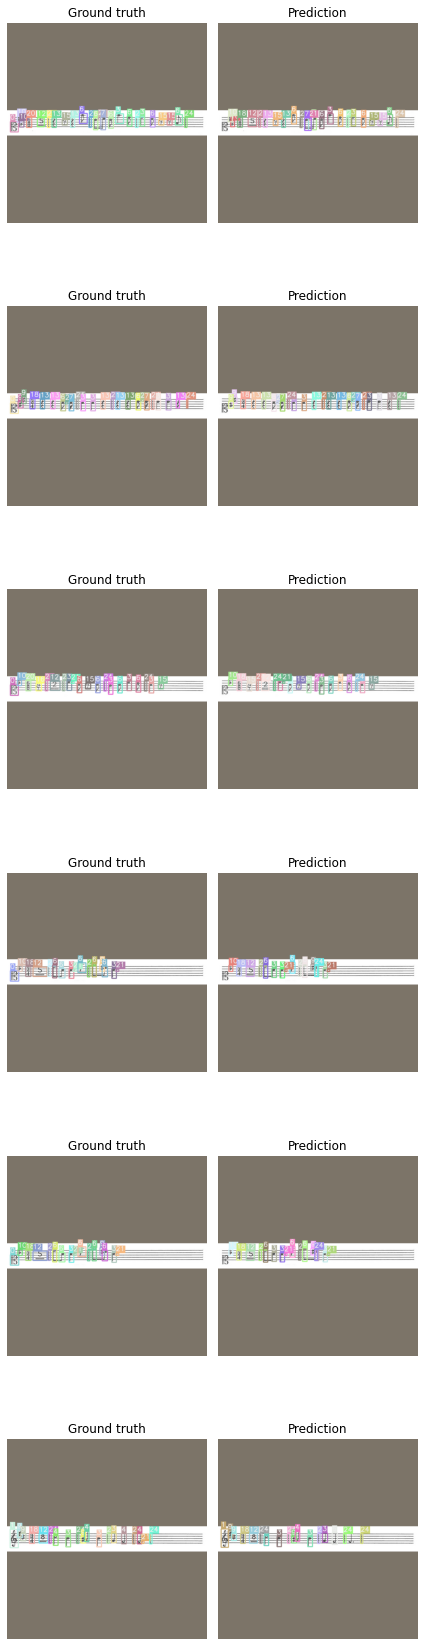

In [ ]:
faster_rcnn.show_results(model, valid_ds)

## Inferencia

In [ ]:
state_dict = torch.load('/content/models/FasterRCMM.pth')
model = faster_rcnn.model(num_classes=25)

In [ ]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [ ]:
k = random.choice(range(1,2309))
test=cv2.imread('/content/pentagramas/pent'+str(k)+'.jpg')

In [ ]:
infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(size=600), tfms.A.Normalize()])
infer_ds = Dataset.from_images([test], infer_tfms)
infer_dl = faster_rcnn.infer_dl(infer_ds, batch_size=1)
samples, preds = faster_rcnn.predict_dl(model=model, infer_dl=infer_dl)

  0%|          | 0/1 [00:00<?, ?it/s]

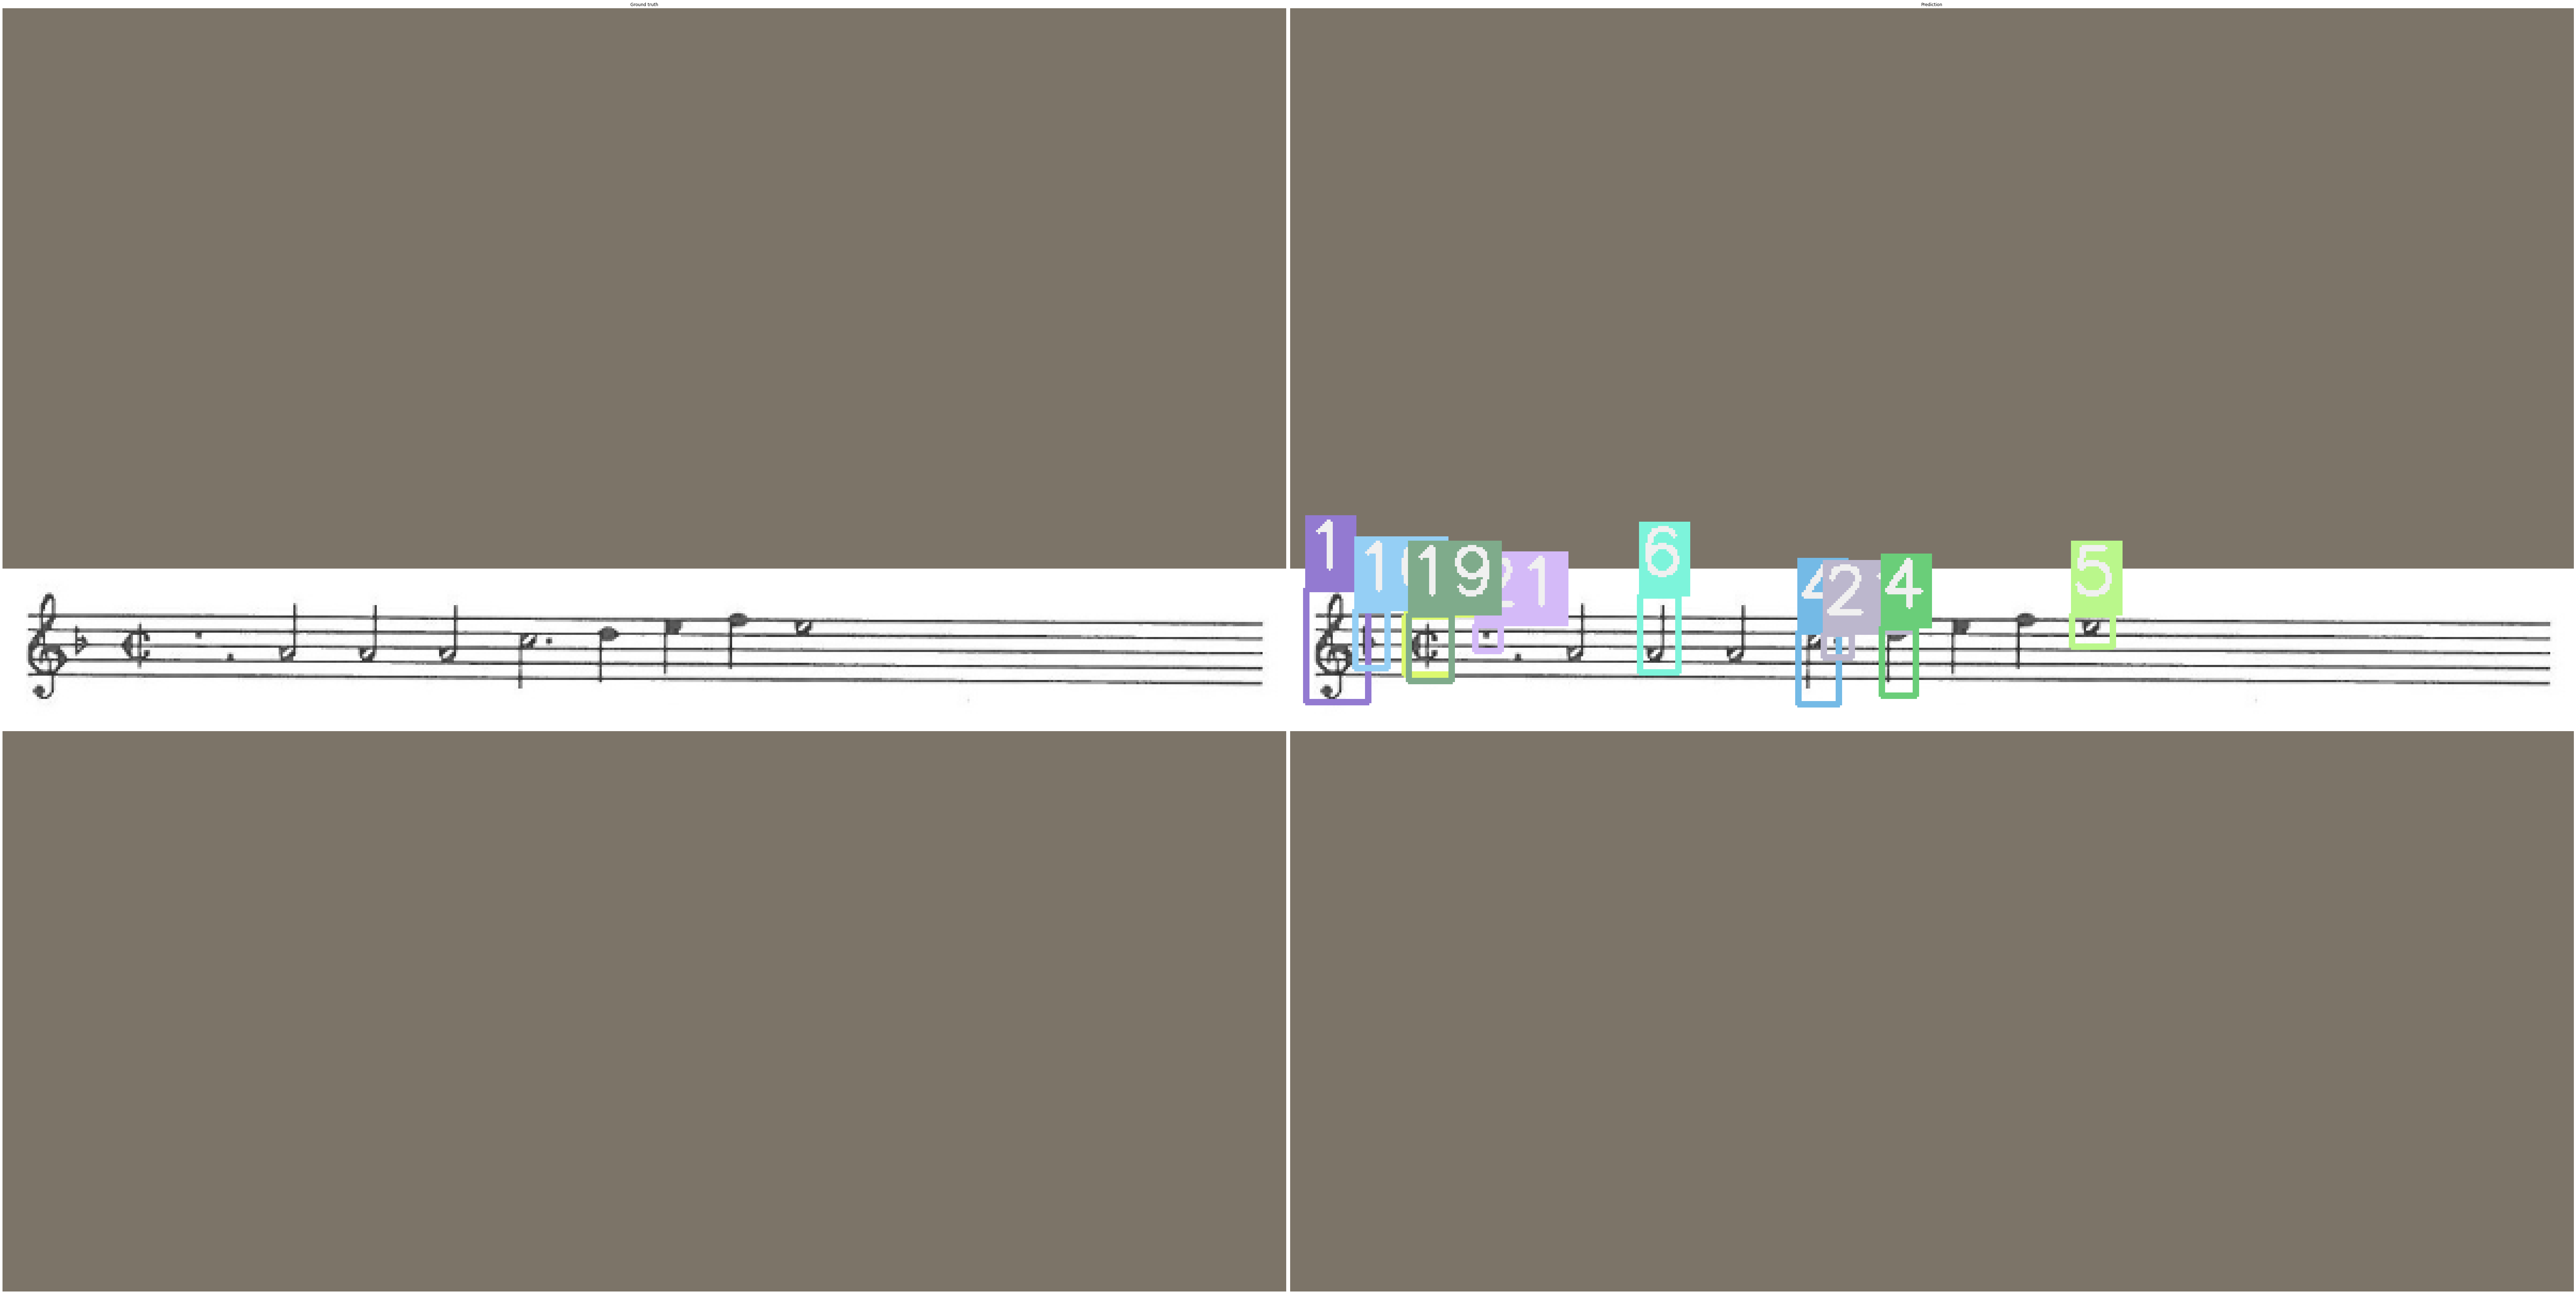

In [ ]:
show_preds(samples=samples, preds=preds,denormalize_fn=denormalize_imagenet,figsize=(100,100))